In [6]:
import json
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 

In [84]:
def get_squad_personalities(token):
    header = {"Authorization": "Bearer" + " " + token}
    req = requests.get("https://finalwhistle.org/en/api/player", headers = header)
    df = pd.DataFrame(req.json())
    df.reset_index(drop=1, inplace=True)
    df = pd.concat([df, df.outfielderSkills.apply(pd.Series)],
                   axis=1)
    df = pd.concat([df, df.goalKeeperSkills.apply(pd.Series)],
                   axis=1)
    df = pd.concat([df, pd.DataFrame.from_dict(df["personalities"]\
                                               .apply(lambda x: {y["personality"]:y["level"] for y in x})\
                                               .apply(pd.Series).fillna(3)-3)],
                  axis=1) 
    df.reset_index(drop=1, inplace=True)
    return df

Open firefox/chrome, open the console (usually F12), find the console tab and enter *localStorage["fw-token"]*. Copy the resulting gibberish into the token variable in the next cell:
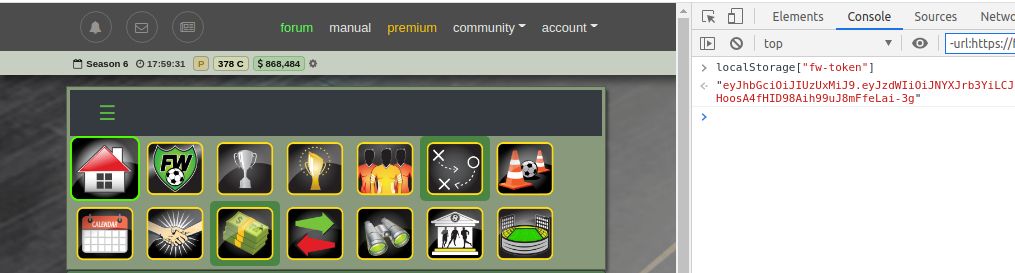

In [70]:
# replace the gibberish with your own token, remember to include the ""s
token = "lksajfd -ajsfajskf.sadfjasmca"

In [90]:
df = get_squad_personalities(token)

In [86]:
df.to_excel("mysquad.xlsx")